# Exercício Aula 4 - Thiago Caveglion
Usar pipeline, usar grid/search random, usar um dataset para fazer regressão

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score

from warnings import filterwarnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor

In [15]:
filterwarnings("ignore")

In [27]:
train=pd.read_csv('train.csv')
test=pd.read_csv("test.csv")

In [28]:
train.head()

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,ReleasedYear,Popularity
0,234.369261,4,Classical,84.774424,0.152603,2009,13.636534
1,343.876324,6,Jazz,65.486515,0.408796,1980,42.910689
2,305.973959,1,Jazz,164.752829,0.318433,1981,48.790880
3,158.897558,4,Pop,186.565004,0.680595,1984,68.362001
4,294.279271,4,Country,140.615871,0.969931,2015,86.969489


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SongLength      8000 non-null   float64
 1   NumInstruments  8000 non-null   int64  
 2   Genre           8000 non-null   object 
 3   Tempo           8000 non-null   float64
 4   LyricalContent  8000 non-null   float64
 5   ReleasedYear    8000 non-null   int64  
 6   Popularity      8000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 437.6+ KB


## Limpeza do dataset

Vamos avaliar os possível valores nulos do dataset.

In [30]:
train.isnull().sum()

SongLength        0
NumInstruments    0
Genre             0
Tempo             0
LyricalContent    0
ReleasedYear      0
Popularity        0
dtype: int64

Não existem valores nulos no dataset, dado que é sintético

In [36]:
train["Genre"] = train["Genre"].replace({'Classical':1,'Jazz':2,'Pop':3,'Country':4,'Rap':5,'Rock':6})
test["Genre"] = test["Genre"].replace({'Classical':1,'Jazz':2,'Pop':3,'Country':4,'Rap':5,'Rock':6})

display(train)
display(test)

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,ReleasedYear,Popularity
0,234.369261,4,1,84.774424,0.152603,2009,13.636534
1,343.876324,6,2,65.486515,0.408796,1980,42.910689
2,305.973959,1,2,164.752829,0.318433,1981,48.790880
3,158.897558,4,3,186.565004,0.680595,1984,68.362001
4,294.279271,4,4,140.615871,0.969931,2015,86.969489
...,...,...,...,...,...,...,...
7995,398.120876,7,1,135.550681,0.101345,1996,40.695441
7996,296.558875,7,3,133.586259,0.143948,2021,27.898666
7997,227.407953,4,1,62.616766,0.142943,1986,10.871648
7998,275.854318,5,2,67.945166,0.182870,1993,11.234010


,SongLength,NumInstruments,Genre,Tempo,LyricalContent,ReleasedYear
0,387.678577,4,1,113.634583,0.798992,2006
1,189.004660,3,5,155.625985,0.345585,1982
2,188.998630,9,2,155.238167,0.671574,1981
3,327.018144,4,1,148.989615,0.259165,2008
4,392.477463,6,3,151.682743,0.203725,2004
...,...,...,...,...,...,...
1995,367.600116,6,5,174.451076,0.636956,2014
1996,231.199729,4,4,188.624571,0.539352,2005
1997,223.347419,6,5,127.990795,0.010382,2003
1998,158.354499,9,3,170.692213,0.676943,2003


# Estabelecendo X, y

Como esse dataset é utilizado para submissões no kaggle, não temos como conferir as métricas de acerto de maneiras tradicionais

In [40]:
X_train, X_test = train.drop(columns=["Popularity"]), test
y_train = train['Popularity']

# Treinando Regressor por arvore de decisão

In [41]:

pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Normaliza os dados
        ('xgbregressor', XGBRegressor(random_state=42))
    ])

param_grid = {
    'xgbregressor__n_estimators': [200,300,400],
    'xgbregressor__learning_rate': [0.1,0.01]
}
    
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Melhores parâmetros: {best_params}\n")


y_pred = grid_search.predict(X_test)

y_pred

Melhores parâmetros: {'xgbregressor__learning_rate': 0.01, 'xgbregressor__n_estimators': 400}



array([64.8361  , 45.0416  , 66.21076 , ..., 19.408287, 68.170456,
       46.048805], dtype=float32)

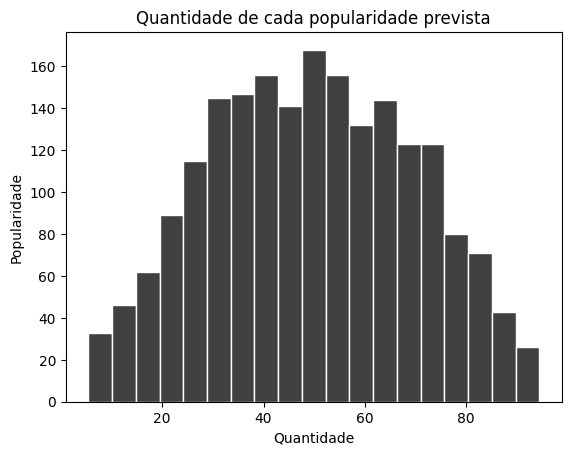

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(y_pred, color="black", edgecolor="white")
plt.title("Quantidade de cada popularidade prevista")
plt.xlabel("Quantidade")
plt.ylabel("Popularidade")
plt.show()

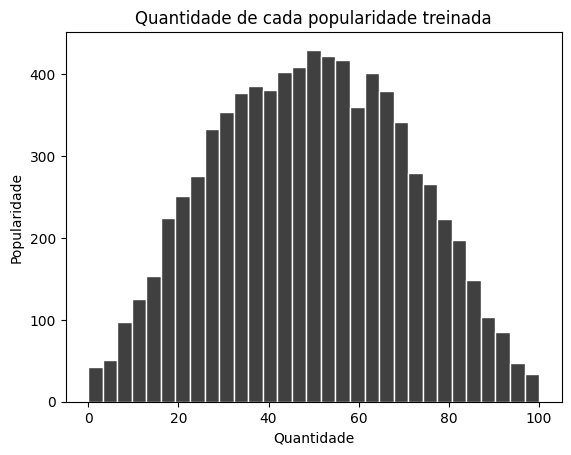

In [51]:

sns.histplot(y_train, color="black", edgecolor="white")
plt.title("Quantidade de cada popularidade treinada")
plt.xlabel("Quantidade")
plt.ylabel("Popularidade")
plt.show()